In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos dados de entrada: Temperatura, Umidade e a Classe (Flor)
dados = np.array([
    [10, 20, 1], [8, 13, 0], [6, 15, 1],
    [5, 11, 1], [20, 26, 0], [22, 26, 0],
    [23, 27, 1], [18, 23, 0]
])

# Definição dos centróides iniciais c1 e c2
c1 = np.array([5, 10, 0])
c2 = np.array([25, 20, 1])


In [21]:
def distancia_euclidiana(ponto1, ponto2):
    return np.sqrt(np.sum((ponto1 - ponto2) ** 2))


In [22]:
# Definição das variáveis para armazenar os clusters e seus pontos
cluster_c1 = []
cluster_c2 = []

# Número máximo de iterações
max_iter = 100

for _ in range(max_iter):
    cluster_c1 = []
    cluster_c2 = []

    # Atribuição dos pontos aos clusters baseados nos centróides
    for ponto in dados:
        dist_c1 = distancia_euclidiana(ponto[:2], c1[:2])
        dist_c2 = distancia_euclidiana(ponto[:2], c2[:2])

        if dist_c1 < dist_c2:
            cluster_c1.append(ponto)
        else:
            cluster_c2.append(ponto)

    # Atualização dos centróides
    c1 = np.mean(cluster_c1, axis=0)
    c2 = np.mean(cluster_c2, axis=0)

    # Condição de parada: os centróides não mudam mais
    if np.array_equal(cluster_c1, c1) and np.array_equal(cluster_c2, c2):
        break


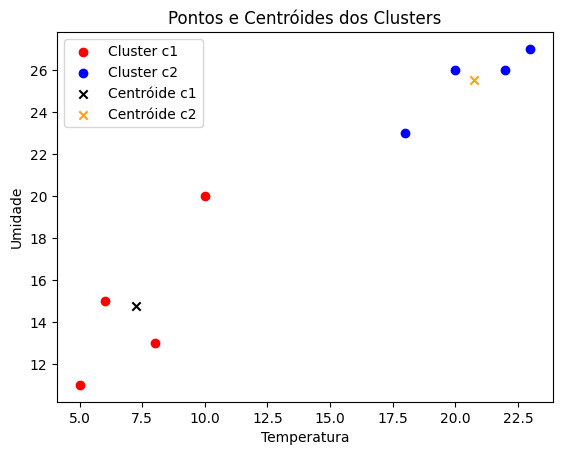

In [23]:
# Conversão dos clusters de volta para numpy array para plotagem
cluster_c1 = np.array(cluster_c1)
cluster_c2 = np.array(cluster_c2)

# Plotagem dos pontos
plt.scatter(cluster_c1[:, 0], cluster_c1[:, 1], color='red', label='Cluster c1')
plt.scatter(cluster_c2[:, 0], cluster_c2[:, 1], color='blue', label='Cluster c2')
plt.scatter(c1[0], c1[1], color='black', marker='x', label='Centróide c1')
plt.scatter(c2[0], c2[1], color='orange', marker='x', label='Centróide c2')

plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend()
plt.title('Pontos e Centróides dos Clusters')

plt.show()
